In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('origindata.csv', parse_dates=['date'])

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [7]:
# Chuyển cột 'date' sang định dạng ngày tháng
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Xử lý dữ liệu thiếu
df['total_cases'] = df['total_cases'].fillna(0)
df['new_cases'] = df['new_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)
df['population'] = df['population'].fillna(method='ffill')  # giữ giá trị dân số đầu tiên

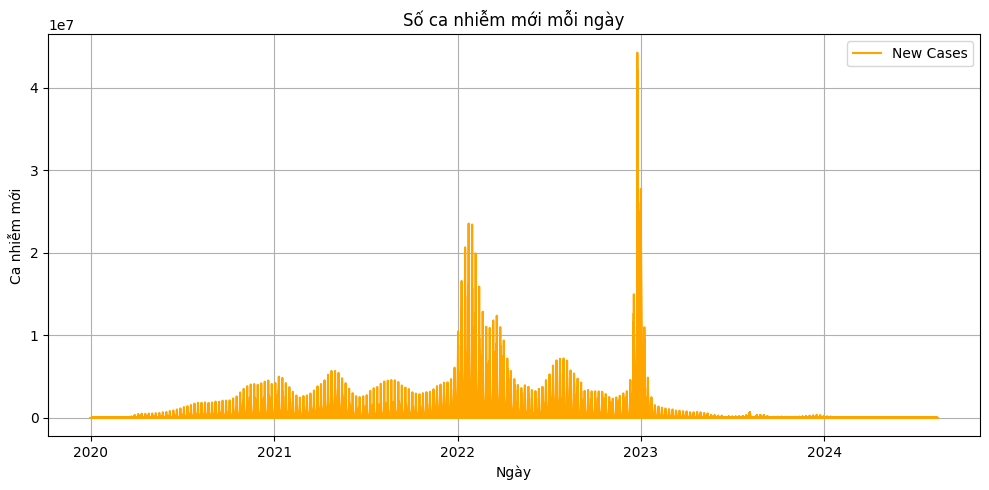

In [9]:
# --- 2. Thống kê Số ca nhiễm mới mỗi ngày ---
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['new_cases'], label='New Cases', color='orange')
plt.title('Số ca nhiễm mới mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Ca nhiễm mới')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

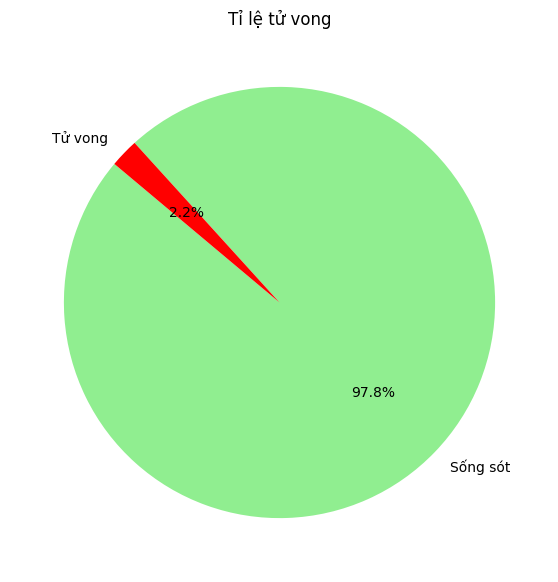

In [10]:
# Tổng số ca nhiễm và tử vong
total_cases_last = df['total_cases'].iloc[-1]
total_deaths_last = df['total_deaths'].iloc[-1]
survived_last = total_cases_last - total_deaths_last

# Dữ liệu cho biểu đồ hình tròn
labels = ['Sống sót', 'Tử vong']
sizes = [survived_last, total_deaths_last]
colors = ['lightgreen', 'red']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ tử vong')
plt.show()

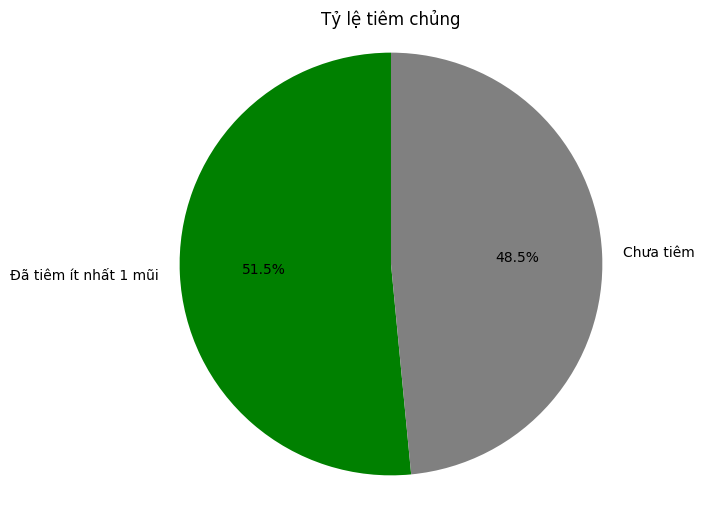

In [12]:
# Lấy dữ liệu mới nhất theo từng quốc gia
latest_data = df.sort_values('date').dropna(subset=['people_vaccinated', 'population'])
latest_per_country = latest_data.groupby('location').last().reset_index()

# Tính tổng toàn cầu
total_vaccinated = latest_per_country['people_vaccinated'].sum()
total_population = latest_per_country['population'].sum()
total_unvaccinated = total_population - total_vaccinated

# Tạo dữ liệu cho biểu đồ
labels = ['Đã tiêm ít nhất 1 mũi', 'Chưa tiêm']
sizes = [total_vaccinated, total_unvaccinated]
colors = ['green', 'gray']

# Vẽ biểu đồ
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ tiêm chủng')
plt.axis('equal')  
plt.show()

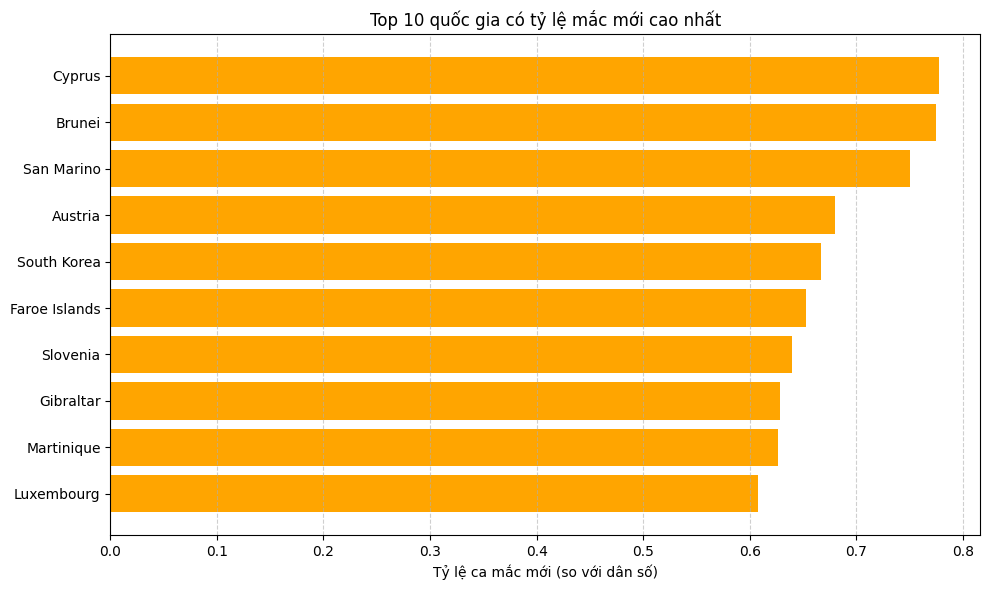

In [15]:
# Tỉ lệ mắc ca nhiễm mới theo từng quốc gia
grouped = df.groupby('location').agg({
    'new_cases': 'sum',
    'population': 'last'
}).reset_index()
# Tính tỷ lệ mắc mới
grouped['infection_rate'] = grouped['new_cases'] / grouped['population']

# 10 quốc gia có tỷ lệ mắc mới cao nhất
top10 = grouped.sort_values(by='infection_rate', ascending=False).head(10)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(10, 6))
plt.barh(top10['location'], top10['infection_rate'], color='orange')
plt.xlabel('Tỷ lệ ca mắc mới (so với dân số)')
plt.title('Top 10 quốc gia có tỷ lệ mắc mới cao nhất')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()